# IMDB Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (20, 5)

## Database engine

In [2]:
# import psycopg2
# from sqlalchemy import create_engine

# coder_db = create_engine('postgresql://localhost/imdb_data')

## Create database

In [3]:
# conn = psycopg2.connect(
#     database='postgres',
#     user='anicolon',
#     password='mignola12',
#     host='127.0.0.1',
#     port='5432',
# )

# conn.autocommit = True
# a
# # Creating a cursor object using the cursor() method
# cursor = conn.cursor()

# # Preparing query to create a database
# sql = '''CREATE database imdb_data'''

# # Creating a database
# cursor.execute(sql)
# print('Database created successfully........')

# # Closing the connection
# conn.close()

## DataFrames to PostgreSQL

In [4]:
name_basics = pd.read_csv(
    r'\name.basics.tsv.gz',
    sep='\t',
    low_memory=False,
)

In [5]:
# name_basics.to_sql('name_basics', con=coder_db, if_exists='fail')

In [6]:
title_basics = pd.read_csv(
    '\title.basics.tsv.gz',
    sep='\t',
    low_memory=False,
)

In [7]:
# title_basics.to_sql('title_basics', con=coder_db, if_exists='fail')

In [8]:
episode_basics = pd.read_csv(
    r'\title.episode.tsv.gz',
    sep='\t',
    low_memory=False,
)

In [9]:
# episode_basics.to_sql('episode_basics', con=coder_db, if_exists='fail')

In [10]:
title_principals = pd.read_csv(
    r'\title.principals.tsv.gz',
    sep='\t',
    low_memory=False,
)

In [11]:
# title_principals.to_sql('title_principals', con=coder_db, if_exists='fail')

In [12]:
title_ratings = pd.read_csv(
    r'\title.ratings.tsv.gz',
    sep='\t',
    low_memory=False,
)

In [13]:
# title_ratings.to_sql('title_ratings', con=coder_db, if_exists='fail')

## PostgreSQL query

In [14]:
# query = ''' SELECT * FROM name_basics LIMIT 10;'''
# pd.read_sql_query(query, coder_db)

## Name basics

In [15]:
# name_basics = pd.read_sql('name_basics', coder_db)

name_basics.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0069467"


## Birth year

<AxesSubplot:ylabel='birthYear'>

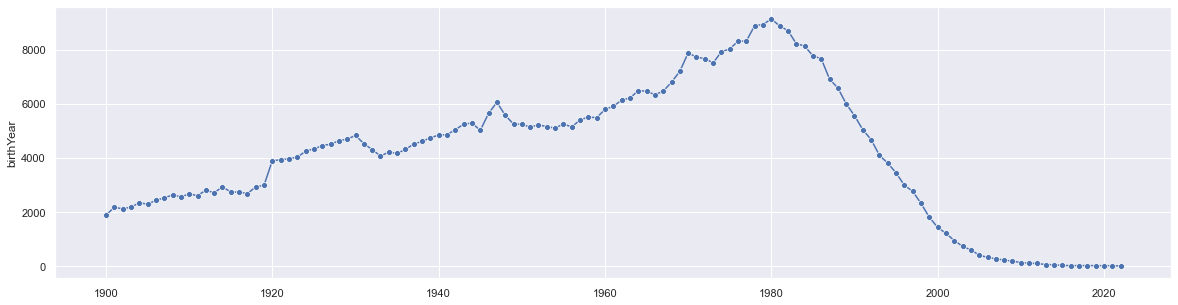

In [16]:
name_basics = name_basics[~name_basics['birthYear'].str.contains('N')]
name_basics['birthYear'] = pd.to_datetime(name_basics['birthYear'], errors = 'coerce')

name_basics['birthYear'] = name_basics['birthYear'].astype('datetime64')
name_basics = name_basics[name_basics['birthYear'] >= '1900']

sns.lineplot(data=name_basics['birthYear'].value_counts(),marker='o')

## Born this year

In [40]:
kids2021 = name_basics[name_basics['birthYear'] > '2021']
kids2021['primaryName']

4244886    Veronika Podgurskaya
4277147         Jacques Webster
Name: primaryName, dtype: object

## Has same name

In [18]:
name_basics['primaryName'].value_counts().head(10)

John Taylor            12
Paul Williams          11
David Lee              11
Mike Jones             11
Paul Smith             10
John Williams          10
Steve Smith            10
Aleksandr Kuznetsov     9
Michael White           9
David Williams          9
Name: primaryName, dtype: int64

## Same first name

In [19]:
name_basics['firstname'] = name_basics['primaryName'].str.split(' ').apply(lambda x: x[0])
name_basics['firstname'].value_counts().head(10)

John       5531
Michael    4828
David      4614
Robert     3596
Peter      3308
Paul       2631
James      2468
Richard    2350
Mark       1948
Chris      1874
Name: firstname, dtype: int64

## Same last name

In [20]:
def splitit(x):
    listed = x.split(' ')
    try:
        splited = ''.join(listed[1:])
        return splited

    except IndexError:
        listed = float('Nan')


name_basics['lastname'] = name_basics['primaryName'].apply(lambda x: splitit(x))

name_basics['lastname'].value_counts().head(10)

            5970
Smith       1027
Williams     907
Lee          874
Jones        836
Johnson      831
Brown        768
Taylor       637
Miller       611
Davis        574
Name: lastname, dtype: int64

In [21]:
# TITLES TABLE

# title_basics = pd.read_sql('title_basics', coder_db)

title_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## List of genres

In [22]:
# GENRES ON DATABASE

def xstr(s):
    return 'DDELETE' if s == '\\N' else str(s)

title_basics['genres'] = title_basics['genres'].apply(lambda x: xstr(x))
title_basics = title_basics[~title_basics['genres'].str.contains('DDELETE')]

from itertools import chain

genres = pd.DataFrame(title_basics['genres'].str.split(',', expand=True))
genres_list = list(chain(genres[0].unique(), genres[1].unique(), genres[2].unique()))

In [23]:
len(list(set(genres_list)))

30

## Count of genres

In [24]:
top_genres = genres[0].append(genres[1].append(genres[2])).value_counts()

C:\Users\anico\AppData\Local\Temp\ipykernel_21192\3272411431.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_genres = genres[0].append(genres[1].append(genres[2])).value_counts()
C:\Users\anico\AppData\Local\Temp\ipykernel_21192\3272411431.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_genres = genres[0].append(genres[1].append(genres[2])).value_counts()


In [25]:
top_genres.head(10)

Drama          2471249
Comedy         1815995
Talk-Show      1050252
Short           996885
Documentary     837880
Romance         790798
News            782145
Family          652270
Reality-TV      479551
Animation       456797
dtype: int64

In [26]:
title_basics.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6004675,tt3606590,tvEpisode,20 saveta za uspeshen kasometrazhen film,20 saveta za uspeshen kasometrazhen film,0,2013,\N,\N,Short
1504657,tt10961772,tvEpisode,Episode dated 13 July 1999,Episode dated 13 July 1999,0,1999,\N,\N,"Music,Reality-TV,Talk-Show"
354641,tt0370042,movie,Usapang lalake,Usapang lalake,0,1970,\N,\N,Action
1707010,tt11324502,tvEpisode,Episode #1.3099,Episode #1.3099,0,\N,\N,\N,"Drama,Romance"
3045616,tt13775466,tvEpisode,6 January 2021: Late Bulletin,6 January 2021: Late Bulletin,0,2021,\N,11,News
6568626,tt4880196,tvEpisode,Episode #1.107,Episode #1.107,0,\N,\N,\N,Crime
7549986,tt7083544,short,Death After Suicide,Death After Suicide,0,2017,\N,\N,"Documentary,Short"
703730,tt0726875,tvEpisode,Episode dated 3 November 1971,Episode dated 3 November 1971,0,1971,\N,\N,"Comedy,Talk-Show"
7446392,tt6854288,tvEpisode,Episode dated 3 May 2017,Episode dated 3 May 2017,0,2017,\N,\N,Talk-Show
5479390,tt2382636,tvEpisode,Daylight Zone/The Pretender/Crime of the Age,Daylight Zone/The Pretender/Crime of the Age,0,2012,\N,\N,"News,Sci-Fi"


In [42]:
[i for i in title_basics['titleType'].unique()]

['short',
 'movie',
 'tvEpisode',
 'tvSeries',
 'tvShort',
 'tvMovie',
 'tvMiniSeries',
 'tvSpecial',
 'video',
 'videoGame']

In [28]:
title_movies = title_basics[title_basics['titleType'].str.contains('movie')].copy()

In [29]:
title_movies['primaryTitle'].value_counts().head(5)

Home      47
Mother    45
Broken    44
Alone     43
Hamlet    42
Name: primaryTitle, dtype: int64

In [30]:
title_tv = title_basics[title_basics['titleType'].str.contains('tvSeries|tvMiniSeries')].copy()

In [31]:
title_tv['primaryTitle'].value_counts().head(5)

Joulukalenteri    35
Shock Theater     31
Shock Theatre     28
Spotlight         25
Roommates         25
Name: primaryTitle, dtype: int64

In [32]:
title_games = title_basics[title_basics['titleType'].str.contains('videoGame')].copy()

In [33]:
title_games['primaryTitle'].value_counts().head(5)

Donkey Kong    6
Jeopardy!      6
Star Trek      6
Baseball       6
Football       5
Name: primaryTitle, dtype: int64

In [34]:
title_movies = title_movies[title_movies['startYear'].str.len() >= 4]

In [35]:
title_movies['startYear'].astype('datetime64[Y]').max()

Timestamp('2028-01-01 00:00:00')

In [36]:
title_movies['startYear'].astype('datetime64[Y]')[title_movies['startYear'].astype('datetime64[Y]') > "2021"].unique()

array(['2022-01-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2025-01-01T00:00:00.000000000',
       '2027-01-01T00:00:00.000000000', '2026-01-01T00:00:00.000000000',
       '2028-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
movies_by_year = title_movies['startYear'].astype('datetime64[Y]').value_counts()

movies_by_year

2018-01-01    17527
2017-01-01    17418
2019-01-01    17016
2016-01-01    16958
2021-01-01    16414
              ...  
2028-01-01        4
1903-01-01        3
1904-01-01        2
1897-01-01        1
1896-01-01        1
Name: startYear, Length: 133, dtype: int64

In [38]:
len(title_movies['primaryTitle'])

460986

<AxesSubplot:ylabel='startYear'>

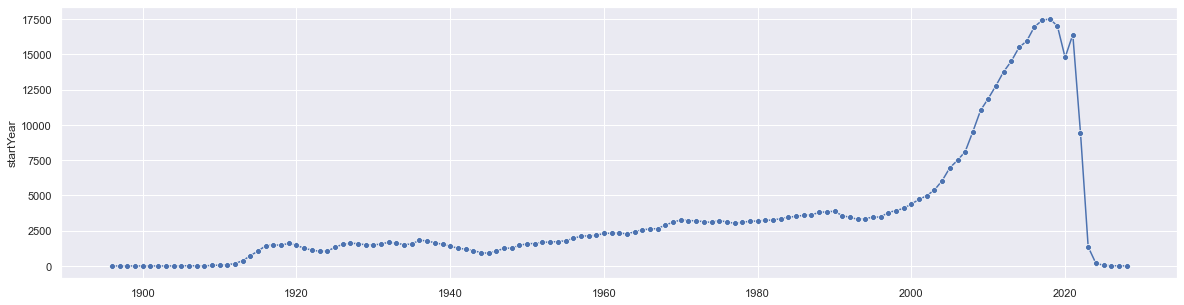

In [39]:
sns.lineplot(data=movies_by_year,marker='o')